<a href="https://colab.research.google.com/github/Moimschoh/data-analyst/blob/main/plot_PlottingShots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline


# Plotting shots




In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen, VerticalPitch

## Opening the dataset
The first thing we have to do is open the data. We use a parser SBopen available in mplsoccer.
Using method *event* and putting the id of the game as a parameter we load the data.
The event data, which we will mostly focus on,
is stored in a dataframe *df*. From this dataframe we take out the names of the two teams.
Then, we filter the dataframe so that only shots are left.



In [ ]:
parser = Sbopen()
df, related, freeze, tactics = parser.event(69301)
#get team names
team1, team2 = df.team_name.unique()
#A dataframe of shots
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')

## Making the shot map using iterative solution
First let's draw the pitch using the [MPL Soccer class](https://mplsoccer.readthedocs.io/en/latest/gallery/pitch_setup/plot_pitches.html),

In this example, we set variables for pitch length and width to the Statsbomb coordinate system (they use yards).
You can read more about [different coordinate systems here](https://mplsoccer.readthedocs.io/en/latest/gallery/pitch_setup/plot_compare_pitches.html)

Now, we iterate through all the shots in the match. We take *x* and *y* coordinates, the team name and information
if goal was scored. If It was scored, we plot a solid circle with a name of the player, if not, we plot a
transculent circle (parameter alpha tunes the transcluency).
To have England's shots on one half and Sweden shots on the other half,
we subtract *x* and *y* from the pitch length and height.

Football data tends to be attacking left to right, and we will use this as default in the course.



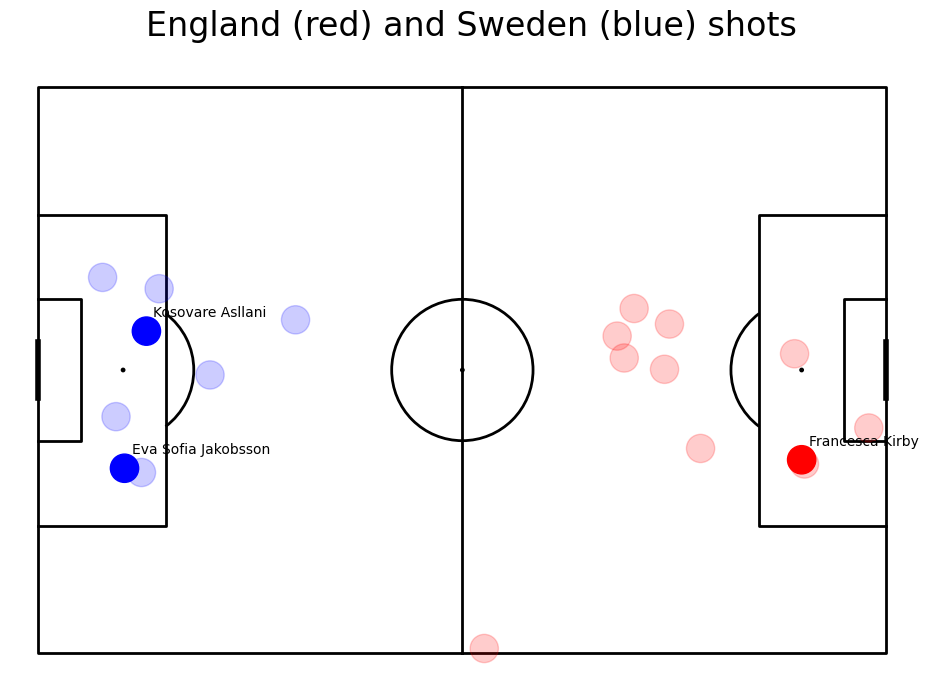

In [ ]:
pitch = Pitch(line_color = "black")
fig, ax = pitch.draw(figsize=(10, 7))
#Size of the pitch in yards (!!!)
pitchLengthX = 120
pitchWidthY = 80
#Plot the shots by looping through them.
for i,shot in shots.iterrows():
    #get the information
    x=shot['x']
    y=shot['y']
    goal=shot['outcome_name']=='Goal'
    team_name=shot['team_name']
    #set circlesize
    circleSize=2
    #plot England
    if (team_name==team1):
        if goal:
            shotCircle=plt.Circle((x,y),circleSize,color="red")
            plt.text(x+1,y-2,shot['player_name'])
        else:
            shotCircle=plt.Circle((x,y),circleSize,color="red")
            shotCircle.set_alpha(.2)
    #plot Sweden
    else:
        if goal:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue")
            plt.text(pitchLengthX-x+1,pitchWidthY - y - 2 ,shot['player_name'])
        else:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue")
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)
#set title
fig.suptitle("England (red) and Sweden (blue) shots", fontsize = 24)
fig.set_size_inches(10, 7)
plt.show()

## Using mplsoccer's Pitch class
This time we make a direct query to return only shots by each team.
We only need the columns with cooridnates, outcome (showing if goal was scored),
and player name. If a goal was scored, we use scatter method
to plot a circle and annotate method to mark scorer's name.
If not, we use scatter method to draw a translucent circle.
Note that, once again, to plot the shots on different halves we needed to reverse the coordinates for Sweden.
Using pitch.scatter we could have plotted all shots using one line.
However, since name of a player and alpha differs if goal was scored,
it was more convenient to loop through smaller dataset.



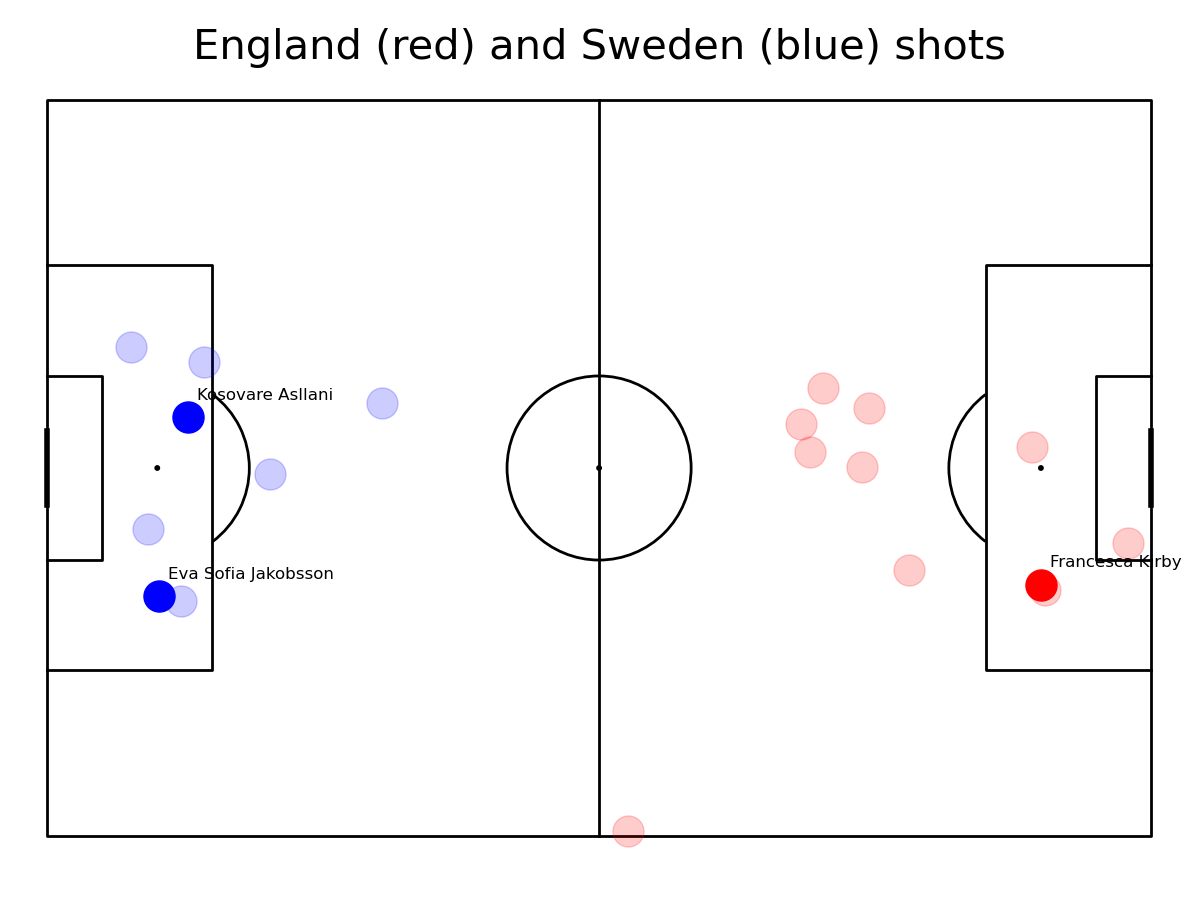

In [ ]:
#create pitch
pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#query
mask_england = (df.type_name == 'Shot') & (df.team_name == team1)
#finding rows in the df and keeping only necessary columns
df_england = df.loc[mask_england, ['x', 'y', 'outcome_name', "player_name"]]

#plot them - if shot ended with Goal - alpha 1 and add name
#for England
for i, row in df_england.iterrows():
    if row["outcome_name"] == 'Goal':
    #make circle
       pitch.scatter(row.x, row.y, alpha = 1, s = 500, color = "red", ax=ax['pitch'])
       pitch.annotate(row["player_name"], (row.x + 1, row.y - 2), ax=ax['pitch'], fontsize = 12)
    else:
       pitch.scatter(row.x, row.y, alpha = 0.2, s = 500, color = "red", ax=ax['pitch'])

mask_sweden = (df.type_name == 'Shot') & (df.team_name == team2)
df_sweden = df.loc[mask_sweden, ['x', 'y', 'outcome_name', "player_name"]]

#for Sweden we need to revert coordinates
for i, row in df_sweden.iterrows():
    if row["outcome_name"] == 'Goal':
       pitch.scatter(120 - row.x, 80 - row.y, alpha = 1, s = 500, color = "blue", ax=ax['pitch'])
       pitch.annotate(row["player_name"], (120 - row.x + 1, 80 - row.y - 2), ax=ax['pitch'], fontsize = 12)
    else:
       pitch.scatter(120 - row.x, 80 - row.y, alpha = 0.2, s = 500, color = "blue", ax=ax['pitch'])

fig.suptitle("England (red) and Sweden (blue) shots", fontsize = 30)
plt.show()

## Plotting shots on one half
To plot shots of only one team on one half we use VerticalPitch() class
If you set *half* to *True*, you will plot only one half of the pitch.
It is a nice way of plotting shots since they rarely occur on the defensive half.
We plot all the shots at once this time, without looping through the dataframe this time.



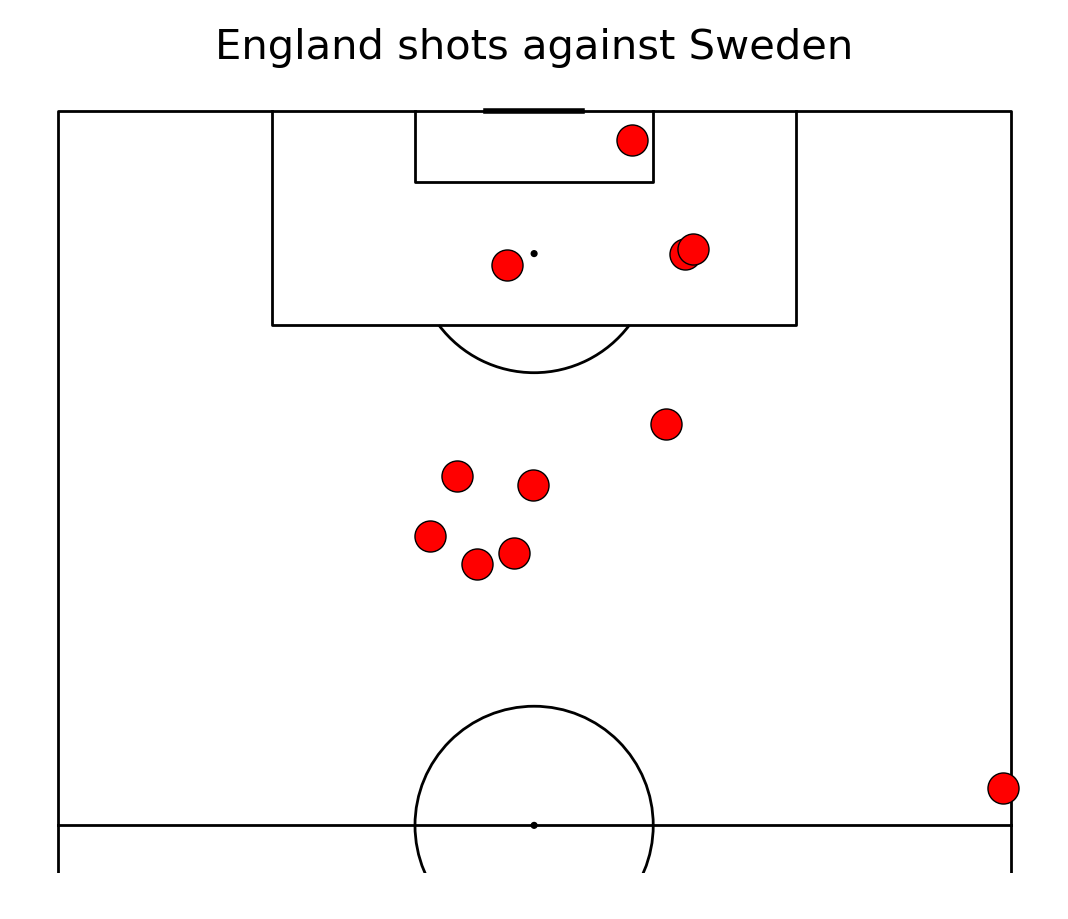

In [ ]:
pitch = VerticalPitch(line_color='black', half = True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#plotting all shots
pitch.scatter(df_england.x, df_england.y, alpha = 1, s = 500, color = "red", ax=ax['pitch'], edgecolors="black")
fig.suptitle("England shots against Sweden", fontsize = 30)
plt.show()

## References
You can find detailed documentation and resources on soccer analytics at the following link:

[Soccermatics Documentation](https://soccermatics.readthedocs.io/en/latest/index.html)
